In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
models_name = ['llama3', 'opt', 'qwen']

def get_model_files(model_name):
    model_files = []
    print('Found the following files for model ', model_name)
    for file in os.listdir('./'):
        if file.startswith(model_name):
            model_files.append(file)
            print(file)
    return model_files


In [3]:
files = get_model_files('llama3')

Found the following files for model  llama3
llama3_sciq_layer_31.pkl
llama3_coqa_layer_31.pkl
llama3_trivia_qa_layer_31.pkl


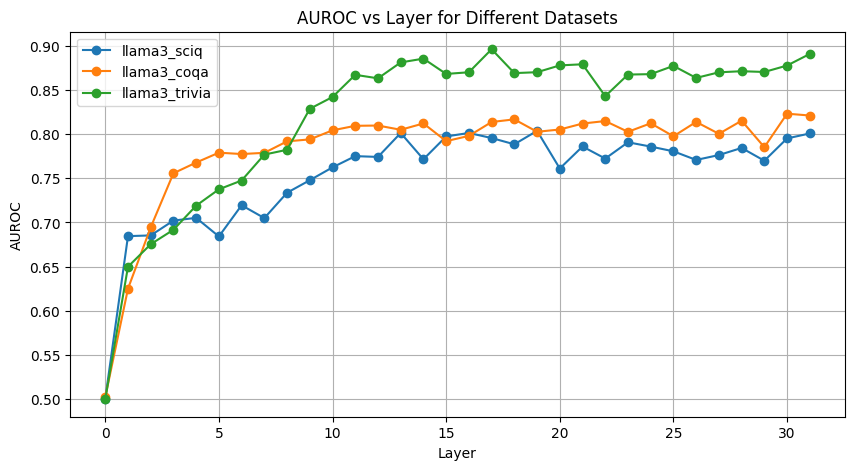

In [4]:
aurocs = []
plt.figure(figsize=(10, 5))
for file in files:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        auroc = np.array([lay['auroc'] for lay in data])
        aurocs.append(auroc)  
        plt.plot(auroc, marker='o', label='_'.join(file.split('_', 2)[:2]))
plt.xlabel('Layer')
plt.ylabel('AUROC')
plt.title('AUROC vs Layer for Different Datasets')
plt.legend()
plt.grid()
plt.show()

In [5]:
r = []
for i in range(len(aurocs[0])):
    total = 0
    for j in range(len(aurocs)):
        total += aurocs[j][i]
    r.append(total)
r.index(max(r))


31

# Calculate the AUROC

In [6]:
for file in os.listdir('./'):
    if file.endswith('.pkl'):
        with open(file, 'rb') as f:
            data = pickle.load(f)

In [7]:
data

[{'accuracy': 0.603,
  'accuracy_positive': 0.3907766990291262,
  'accuracy_negative': 0.7517006802721088,
  'total_loss': 21.869883239269257,
  'auroc': 0.6141911861832112},
 {'accuracy': 0.589,
  'accuracy_positive': 0.8152709359605911,
  'accuracy_negative': 0.43434343434343436,
  'total_loss': 33.519442319869995,
  'auroc': 0.6937229437229437},
 {'accuracy': 0.415,
  'accuracy_positive': 0.9950248756218906,
  'accuracy_negative': 0.02508361204013378,
  'total_loss': 40.837609231472015,
  'auroc': 0.7156733057122414},
 {'accuracy': 0.409,
  'accuracy_positive': 0.99,
  'accuracy_negative': 0.021666666666666667,
  'total_loss': 38.50771486759186,
  'auroc': 0.6855},
 {'accuracy': 0.637,
  'accuracy_positive': 0.7363420427553444,
  'accuracy_negative': 0.5647668393782384,
  'total_loss': 20.203043699264526,
  'auroc': 0.7163797029032773},
 {'accuracy': 0.614,
  'accuracy_positive': 0.05721393034825871,
  'accuracy_negative': 0.9882943143812709,
  'total_loss': 27.346070259809494,
  'a